In [33]:
import pymc as pm
print(pm.__version__)

4.1.2


In [34]:
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np

In [35]:
import pandas as pd
pd.set_option('display.float_format',  '{:}'.format)

In [36]:
df = pd.read_csv("sao-159063.csv", sep=',')
df.head()

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack
0,4500.0,[17:34:45.8421095],35885.0,2165712.0,14294.14,1071.1,-149,18880,362.0,246.0
1,4501.0,[17:34:45.8522091],23481.0,2144576.0,14235.54,993.38,-149,18336,362.0,246.0
2,4502.0,[17:34:45.8623086],38426.0,2157088.0,14219.2,999.84,-149,18496,362.0,246.0
3,4503.0,[17:34:45.8724082],22565.0,2142864.0,14230.19,1002.09,-149,17376,362.0,246.0
4,4504.0,[17:34:45.8825077],41895.0,2165312.0,14251.12,1058.88,-149,18336,362.0,246.0


In [37]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
# df['timeInfo'] = pd.to_datetime(df['timeInfo'], format='%H:%M:%S.%f')
df['timeInfo'] = pd.to_datetime(df['timeInfo'])

df.head()

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack
0,4500.0,2022-07-20 17:34:45.842109,35885.0,2165712.0,14294.14,1071.1,-149,18880,362.0,246.0
1,4501.0,2022-07-20 17:34:45.852209,23481.0,2144576.0,14235.54,993.38,-149,18336,362.0,246.0
2,4502.0,2022-07-20 17:34:45.862308,38426.0,2157088.0,14219.2,999.84,-149,18496,362.0,246.0
3,4503.0,2022-07-20 17:34:45.872408,22565.0,2142864.0,14230.19,1002.09,-149,17376,362.0,246.0
4,4504.0,2022-07-20 17:34:45.882507,41895.0,2165312.0,14251.12,1058.88,-149,18336,362.0,246.0


In [38]:
df['JD'] = Time(df['timeInfo']).jd

In [39]:
df['FrameNum'].dtypes

dtype('float64')

In [40]:
df['JD']

0      2459781.232475024
1     2459781.2324751415
2     2459781.2324752584
3     2459781.2324753753
4      2459781.232475492
             ...        
896   2459781.2325797607
897   2459781.2325798776
898   2459781.2325799945
899   2459781.2325801114
900   2459781.2325802282
Name: JD, Length: 901, dtype: float64

In [41]:
df

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack,JD
0,4500.0,2022-07-20 17:34:45.842109,35885.0,2165712.0,14294.14,1071.1,-149,18880,362.0,246.0,2459781.232475024
1,4501.0,2022-07-20 17:34:45.852209,23481.0,2144576.0,14235.54,993.38,-149,18336,362.0,246.0,2459781.2324751415
2,4502.0,2022-07-20 17:34:45.862308,38426.0,2157088.0,14219.2,999.84,-149,18496,362.0,246.0,2459781.2324752584
3,4503.0,2022-07-20 17:34:45.872408,22565.0,2142864.0,14230.19,1002.09,-149,17376,362.0,246.0,2459781.2324753753
4,4504.0,2022-07-20 17:34:45.882507,41895.0,2165312.0,14251.12,1058.88,-149,18336,362.0,246.0,2459781.232475492
...,...,...,...,...,...,...,...,...,...,...,...
896,5396.0,2022-07-20 17:34:54.891340,-13344.0,2107600.0,14234.52,983.5,-149,17504,362.0,251.0,2459781.2325797607
897,5397.0,2022-07-20 17:34:54.901440,-6075.0,2110592.0,14205.82,1053.91,-149,17248,362.0,251.0,2459781.2325798776
898,5398.0,2022-07-20 17:34:54.911539,-2152.0,2119104.0,14236.62,957.37,-149,17440,362.0,251.0,2459781.2325799945
899,5399.0,2022-07-20 17:34:54.921639,-8683.0,2111184.0,14227.3,1038.32,-149,18432,362.0,251.0,2459781.2325801114


In [42]:
df['frac_JD'] = df['JD'] - np.floor(df['JD']).astype(int)

In [43]:
df

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack,JD,frac_JD
0,4500.0,2022-07-20 17:34:45.842109,35885.0,2165712.0,14294.14,1071.1,-149,18880,362.0,246.0,2459781.232475024,0.23247502418234944
1,4501.0,2022-07-20 17:34:45.852209,23481.0,2144576.0,14235.54,993.38,-149,18336,362.0,246.0,2459781.2324751415,0.23247514152899384
2,4502.0,2022-07-20 17:34:45.862308,38426.0,2157088.0,14219.2,999.84,-149,18496,362.0,246.0,2459781.2324752584,0.23247525840997696
3,4503.0,2022-07-20 17:34:45.872408,22565.0,2142864.0,14230.19,1002.09,-149,17376,362.0,246.0,2459781.2324753753,0.23247537529096007
4,4504.0,2022-07-20 17:34:45.882507,41895.0,2165312.0,14251.12,1058.88,-149,18336,362.0,246.0,2459781.232475492,0.2324754921719432
...,...,...,...,...,...,...,...,...,...,...,...,...
896,5396.0,2022-07-20 17:34:54.891340,-13344.0,2107600.0,14234.52,983.5,-149,17504,362.0,251.0,2459781.2325797607,0.2325797607190907
897,5397.0,2022-07-20 17:34:54.901440,-6075.0,2110592.0,14205.82,1053.91,-149,17248,362.0,251.0,2459781.2325798776,0.23257987760007381
898,5398.0,2022-07-20 17:34:54.911539,-2152.0,2119104.0,14236.62,957.37,-149,17440,362.0,251.0,2459781.2325799945,0.23257999448105693
899,5399.0,2022-07-20 17:34:54.921639,-8683.0,2111184.0,14227.3,1038.32,-149,18432,362.0,251.0,2459781.2325801114,0.23258011136204004


Text(0.5, 0, 'JD')

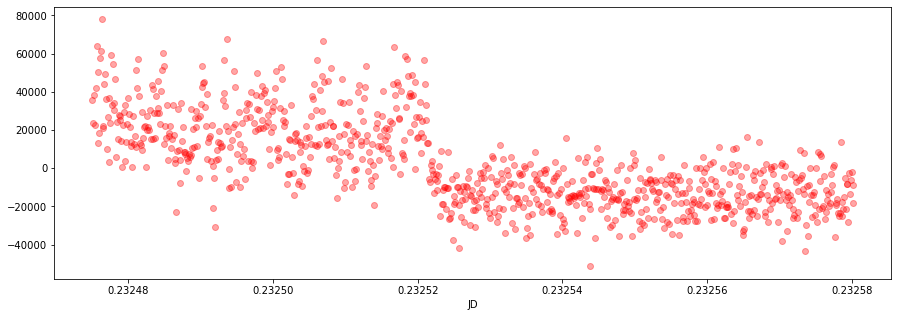

In [45]:
fig, ax = plt.subplots(figsize=(15,5))
# ax.plot(data['Time'], data['Value'], 'ro', alpha=0.5)
ax.plot(df['frac_JD'], df['signal-stack'], 'ro', alpha=0.35)
# ax.set_xlabel('UTC (mm:ss.ssssss)')
# ax.set_xlim(3300, 3700)
ax.set_xlabel('JD')

### Normalisasi

In [49]:
value_scaled = df['signal-stack']/(df['signal-stack'].std()*2)

Text(0.5, 0, 'Frames')

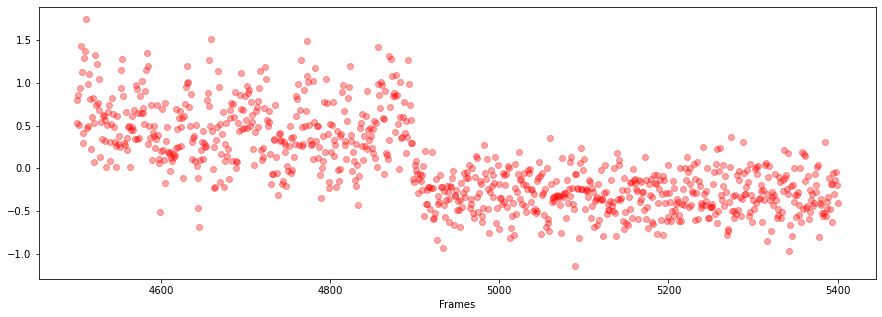

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
# ax.plot(data['frac_JD'], value_scaled, 'ro', alpha=0.35)
ax.plot(df['FrameNum'], value_scaled, 'ro', alpha=0.35)
ax.set_xlabel('Frames')

### Normalisasi cara #2

In [51]:
df['signal'] = df['signal-stack'] + 20000
df

,FrameNum,timeInfo,signal-stack,appsum-stack,avgbkg-stack,stdbkg-stack,nmaskpx-stack,maxpx-stack,xcentroid-stack,ycentroid-stack,JD,frac_JD,signal
0,4500.0,2022-07-20 17:34:45.842109,35885.0,2165712.0,14294.14,1071.1,-149,18880,362.0,246.0,2459781.232475024,0.23247502418234944,55885.0
1,4501.0,2022-07-20 17:34:45.852209,23481.0,2144576.0,14235.54,993.38,-149,18336,362.0,246.0,2459781.2324751415,0.23247514152899384,43481.0
2,4502.0,2022-07-20 17:34:45.862308,38426.0,2157088.0,14219.2,999.84,-149,18496,362.0,246.0,2459781.2324752584,0.23247525840997696,58426.0
3,4503.0,2022-07-20 17:34:45.872408,22565.0,2142864.0,14230.19,1002.09,-149,17376,362.0,246.0,2459781.2324753753,0.23247537529096007,42565.0
4,4504.0,2022-07-20 17:34:45.882507,41895.0,2165312.0,14251.12,1058.88,-149,18336,362.0,246.0,2459781.232475492,0.2324754921719432,61895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,5396.0,2022-07-20 17:34:54.891340,-13344.0,2107600.0,14234.52,983.5,-149,17504,362.0,251.0,2459781.2325797607,0.2325797607190907,6656.0
897,5397.0,2022-07-20 17:34:54.901440,-6075.0,2110592.0,14205.82,1053.91,-149,17248,362.0,251.0,2459781.2325798776,0.23257987760007381,13925.0
898,5398.0,2022-07-20 17:34:54.911539,-2152.0,2119104.0,14236.62,957.37,-149,17440,362.0,251.0,2459781.2325799945,0.23257999448105693,17848.0
899,5399.0,2022-07-20 17:34:54.921639,-8683.0,2111184.0,14227.3,1038.32,-149,18432,362.0,251.0,2459781.2325801114,0.23258011136204004,11317.0


In [52]:
value_scaled2 = df['signal']/(df['signal'].std()*2)

Text(0.5, 0, 'Frames')

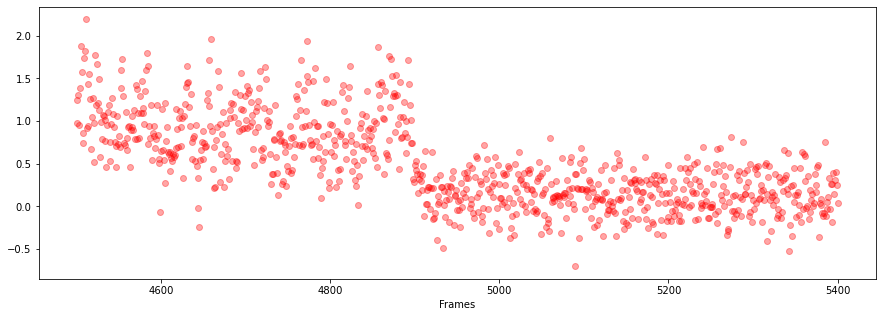

In [53]:
fig, ax = plt.subplots(figsize=(15,5))
# ax.plot(data['frac_JD'], value_scaled, 'ro', alpha=0.35)
ax.plot(df['FrameNum'], value_scaled2, 'ro', alpha=0.35)
ax.set_xlabel('Frames')

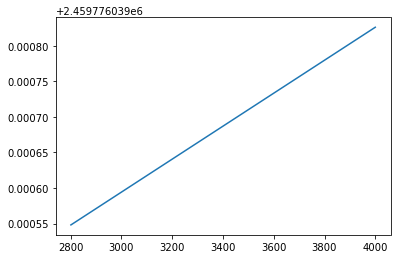

In [13]:
x = df['FrameNum']
y = df['JD']

plt.plot(x,y)

In [14]:
from scipy.interpolate import interp1d

In [15]:
f = interp1d(x, y, kind='cubic')

In [28]:
ynew = f(3487.828)

In [29]:
ynew

array(2459776.03970741)

In [30]:
baru = Time(ynew, format='jd')

In [31]:
baru

<Time object: scale='utc' format='jd' value=2459776.0397074115>

In [32]:
baru.isot

'2022-07-15T12:57:10.720'

---

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import xarray as xr

from scipy.special import expit as logistic


print(f"Runing on PyMC3 v{pm.__version__}")

Runing on PyMC3 v4.1.2


In [2]:
az.style.use("arviz-darkgrid")

RANDOM_SEED = 58
rng = np.random.default_rng(RANDOM_SEED)


def standardize(series):
    """Standardize a pandas series"""
    return (series - series.mean()) / series.std()

In [3]:
N = 100

true_a, true_b, predictor = 0.5, 3.0, rng.normal(loc=2, scale=6, size=N)
true_mu = true_a + true_b * predictor
true_sd = 2.0

outcome = rng.normal(loc=true_mu, scale=true_sd, size=N)

f"{predictor.mean():.2f}, {predictor.std():.2f}, {outcome.mean():.2f}, {outcome.std():.2f}"

'1.59, 5.69, 4.97, 17.54'

In [4]:
predictor_scaled = standardize(predictor)
outcome_scaled = standardize(outcome)

f"{predictor_scaled.mean():.2f}, {predictor_scaled.std():.2f}, {outcome_scaled.mean():.2f}, {outcome_scaled.std():.2f}"

'0.00, 1.00, -0.00, 1.00'

In [9]:
with pm.Model() as model_1:
    a = pm.Normal("a", 0.0, 10.0)
    b = pm.Normal("b", 0.0, 10.0)

    mu = a + b * predictor_scaled
    sigma = pm.Exponential("sigma", 1.0)

    pm.Normal("obs", mu=mu, sigma=sigma, observed=outcome_scaled)
    idata = pm.sample_prior_predictive(samples=50, random_seed=rng)

In [10]:
idata

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

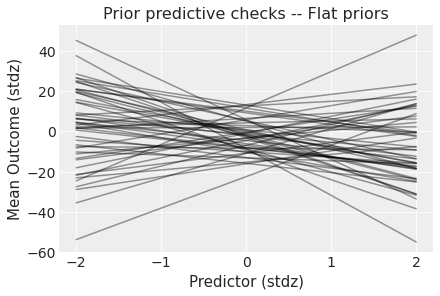

In [11]:
_, ax = plt.subplots()

x = xr.DataArray(np.linspace(-2, 2, 50), dims=["plot_dim"])
prior = idata.prior
y = prior["a"] + prior["b"] * x

ax.plot(x, y.stack(sample=("chain", "draw")), c="k", alpha=0.4)

ax.set_xlabel("Predictor (stdz)")
ax.set_ylabel("Mean Outcome (stdz)")
ax.set_title("Prior predictive checks -- Flat priors");

In [12]:
x

<xarray.DataArray (dim_0: 50)>
array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
       -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
       -1.18367347, -1.10204082, -1.02040816, -0.93877551, -0.85714286,
       -0.7755102 , -0.69387755, -0.6122449 , -0.53061224, -0.44897959,
       -0.36734694, -0.28571429, -0.20408163, -0.12244898, -0.04081633,
        0.04081633,  0.12244898,  0.20408163,  0.28571429,  0.36734694,
        0.44897959,  0.53061224,  0.6122449 ,  0.69387755,  0.7755102 ,
        0.85714286,  0.93877551,  1.02040816,  1.10204082,  1.18367347,
        1.26530612,  1.34693878,  1.42857143,  1.51020408,  1.59183673,
        1.67346939,  1.75510204,  1.83673469,  1.91836735,  2.        ])
Dimensions without coordinates: dim_0

In [15]:
prior['b']

<xarray.DataArray 'b' (chain: 1, draw: 50)>
array([[ -4.62475736,  15.66138975,  -4.54492823,  -0.39639303,
          2.27373234, -11.53885703,   3.88721341,  -4.84398506,
         -9.5759643 ,  -5.25542446,  -9.49561922,  -2.83682193,
         -1.45176499,  10.30864579, -23.15916253,   8.53306433,
        -11.77718918,  -3.90143846,  -6.70865748,   3.91384335,
         -5.47674835,   6.39551839,   1.00074155,  18.11514677,
         12.32241346,  -5.11763067,   6.49192564,  -7.89869914,
        -10.83807928,  -6.81820047,  -4.23218044, -11.04645113,
          7.03746973,  -6.37113262,   2.4961926 ,  -5.86616472,
          8.67526843,   5.43935982, -14.0006641 ,   0.14208495,
         -7.22770374,  -5.75979277, -14.48008015,  -1.60848681,
         -7.50710441,  -4.4829084 ,   5.25824642, -19.70619144,
          5.10391337, -14.44766678]])
Coordinates:
  * chain    (chain) int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49